<a href="https://colab.research.google.com/github/pashtetttt/math_epidem/blob/main/pps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title("image")
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (2706, 3400, 3)


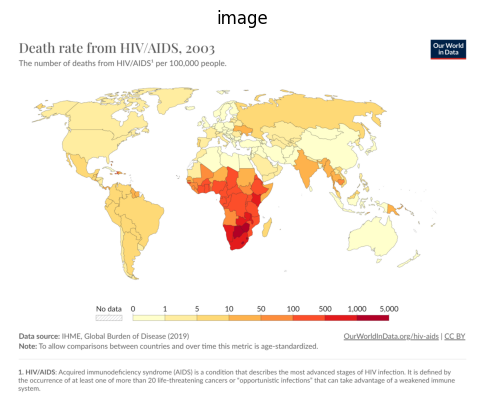

In [2]:
img = view_random_image("images")

In [6]:
from PIL import Image

# Open the image
image = Image.open("images/hiv-death-rates1990.png")

# Define the coordinates of the region to extract
x1, y1, x2, y2 = 1240, 852, 2020, 1656  # Example coordinates

# Crop the region using the coordinates
region = image.crop((x1, y1, x2, y2))

# Process or save the region as needed
region.save("extracted_region.jpg")

In [8]:
for i in range(1990,2020):
  path = "images/hiv-death-rates" + str(i) + ".png"
  image = Image.open(path)
  x1, y1, x2, y2 = 1240, 852, 2020, 1656  # Example coordinates

  # Crop the region using the coordinates
  region = image.crop((x1, y1, x2, y2))

  # Process or save the region as needed
  path_to_save = "cr_images/hiv-death-rates" + str(i) + ".png"
  region.save(path_to_save)

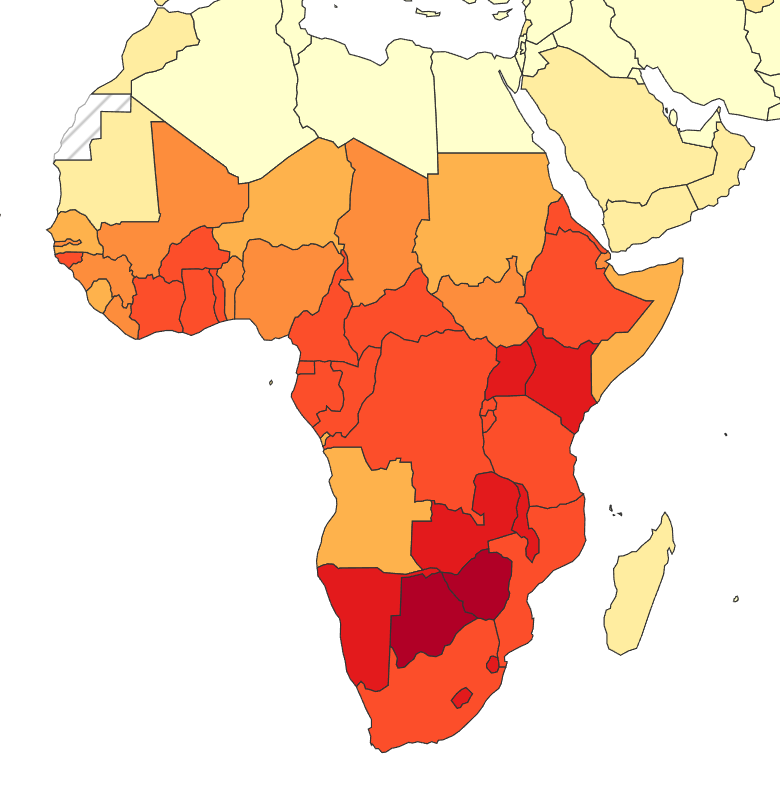

In [13]:
image = Image.open("cr_images/hiv-death-rates" + str(2000) + ".png")
image

Image shape: (804, 780, 3)


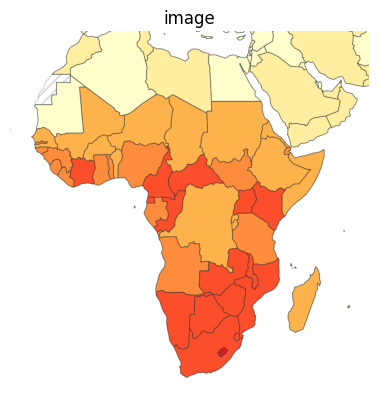

In [14]:
img = view_random_image("cr_images")

In [22]:
import tensorflow

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from PIL import Image
import numpy as np


images = [
    np.array(Image.open('cr_images/hiv-death-rates1990.png')),
    np.array(Image.open('cr_images/hiv-death-rates1991.png')),
    np.array(Image.open('cr_images/hiv-death-rates1992.png')),
    np.array(Image.open('cr_images/hiv-death-rates1993.png')),
    np.array(Image.open('cr_images/hiv-death-rates1994.png')),
    np.array(Image.open('cr_images/hiv-death-rates1995.png')),
    np.array(Image.open('cr_images/hiv-death-rates1996.png'))
]


images = np.array(images) / 255.0
images = np.expand_dims(images, axis=-1)


input_img = Input(shape=(images.shape[1], images.shape[2], images.shape[3]))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='linear', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(images, images, epochs=50, batch_size=32)


new_image = autoencoder.predict(np.expand_dims(images, axis=0))


new_image = (new_image[0] * 255).astype(np.uint8)


new_image = Image.fromarray(new_image.reshape(new_image.shape[1], new_image.shape[2]))


new_image.save('generated_image.jpg')


Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5830, in binary_crossentropy
        bce = target * tf.math.log(output + epsilon())

    ValueError: Dimensions must be equal, but are 804 and 808 for '{{node binary_crossentropy/mul}} = Mul[T=DT_FLOAT](binary_crossentropy/remove_squeezable_dimensions/Squeeze, binary_crossentropy/Log)' with input shapes: [?,804,780,3], [?,808,784,1].
